In [50]:
import networkx as nx

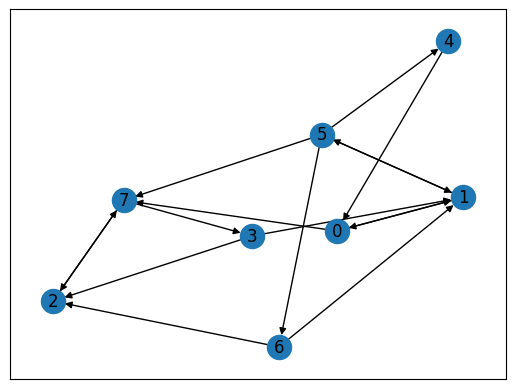

In [58]:
# Simple graph, matrix
import matplotlib.pyplot as plt
g = nx.read_adjlist( "adjacency_list.txt", create_using = nx.DiGraph )
#g = nx.read_edgelist( "edge_list.txt" )
nx.draw_networkx( g )

In [61]:
print( nx.shortest_path( g, '7', '6' ) )
print( nx.diameter( g ) )
# components ?
[ print( e ) for e in nx.strongly_connected_components( g ) ]

['7', '3', '1', '5', '6']
5
{'1', '4', '0', '3', '5', '6', '7', '2'}


[None]

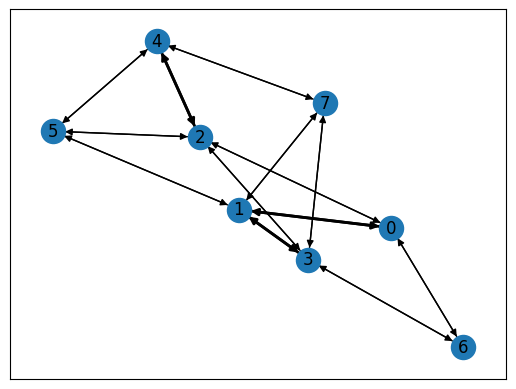

In [68]:
import numpy as np
from scipy.sparse import csr_matrix

# from graph to matrix
m = nx.adjacency_matrix( g ).toarray() # the ndarray version of the matrix

#print( m )

# transpose
m_t = m.transpose()

#print( m_t )

# generic matrix combination operation
def combine( m1, m2, op ):
    assert( np.shape( m1 ) == np.shape( m2 ) )
    dim = np.shape( m1 )
    if ( len( dim ) == 1 ):
        res = np.array( m1 )
        for i in range( 0, dim[ 0 ] ):
            res[ i ] = op( m1[ i ], m2[ i ] )
        return res
    else:
        res = np.array( m1 )
        for i in range( 0, dim[ len( dim ) - 1 ] ):
            res[ i ] = combine( m1[ i ], m2[ i ], op )
        return res
    
SYM_UNION = (lambda x, y: x | y)     # OR
SYM_INTERSECT = (lambda x, y: x & y) # AND

# symmetrisation (via transpose)
sym_uni = combine( m, m_t, SYM_UNION )
sym_int = combine( m, m_t, SYM_INTERSECT )
#print( np.matrix( sym_uni ) )
#print( np.matrix( sym_int ) )

g_uni = nx.from_numpy_array( sym_uni, create_using=nx.DiGraph )
#nx.draw_networkx( g_uni )
g_int = nx.from_numpy_array( sym_int, create_using=nx.DiGraph )
#nx.draw_networkx( g_int )

m_sum = combine( m, m_t, (lambda x, y: x + y ) )
g_sum = nx.from_numpy_array( m_sum, create_using=nx.DiGraph )
nx.draw_networkx( g_sum, width=[ g_sum[v1][v2]['weight'] for v1,v2 in g_sum.edges() ] )
